In [ ]:
import zipfile

with zipfile.ZipFile("archive (1).zip", "r") as zip_ref:
    zip_ref.extractall()



In [ ]:
import zipfile

with zipfile.ZipFile("archive (1).zip", "r") as zip_ref:
    zip_ref.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'archive(1).zip'

In [ ]:
ls

'archive (1).zip'  'Life Expectancy Data.csv'   sample_data/


In [ ]:
import pandas as pd

df = pd.read_csv("Life Expectancy Data.csv")


In [ ]:
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape


(2938, 22)

In [ ]:
"Life expectancy "


'Life expectancy '

In [ ]:
df["Life expectancy "].mean()


np.float64(69.22493169398908)

In [ ]:
df.shape


(2938, 22)

In [ ]:
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
'Life expectancy '


'Life expectancy '

In [ ]:
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df = df.fillna(df.mode().iloc[0])


In [ ]:
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
df["Life expectancy "].mean()


np.float64(69.22493169398908)

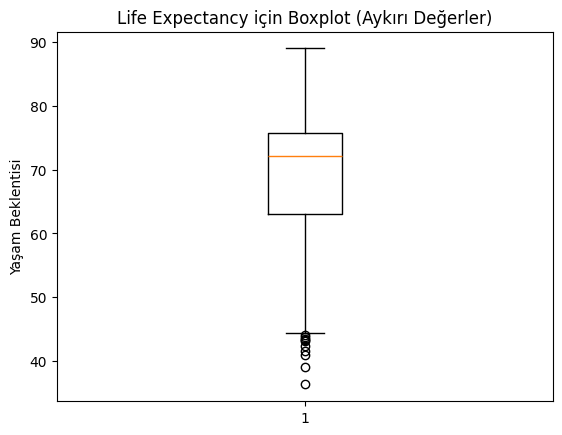

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df["Life expectancy "].dropna())
plt.title("Life Expectancy için Boxplot (Aykırı Değerler)")
plt.ylabel("Yaşam Beklentisi")
plt.show()


In [ ]:
Q1 = df["Life expectancy "].quantile(0.25)
Q3 = df["Life expectancy "].quantile(0.75)

IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

alt_sinir, ust_sinir


(np.float64(44.2), np.float64(94.60000000000001))

In [ ]:
df_temiz = df[
    (df["Life expectancy "] >= alt_sinir) &
    (df["Life expectancy "] <= ust_sinir)
]


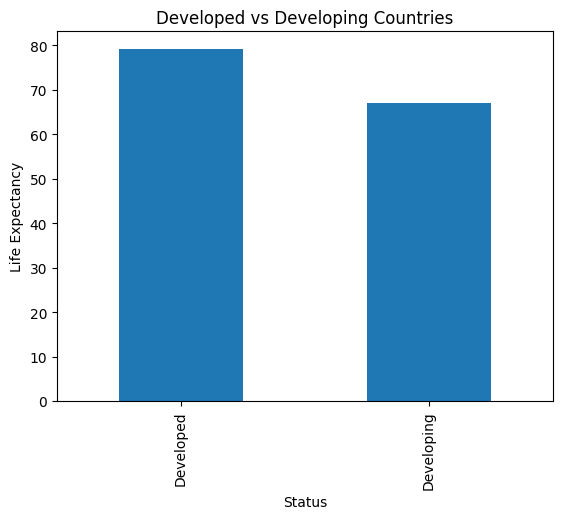

In [ ]:
import matplotlib.pyplot as plt

df.groupby("Status")["Life expectancy "].mean().plot(kind="bar")
plt.title("Developed vs Developing Countries")
plt.ylabel("Life Expectancy")
plt.show()


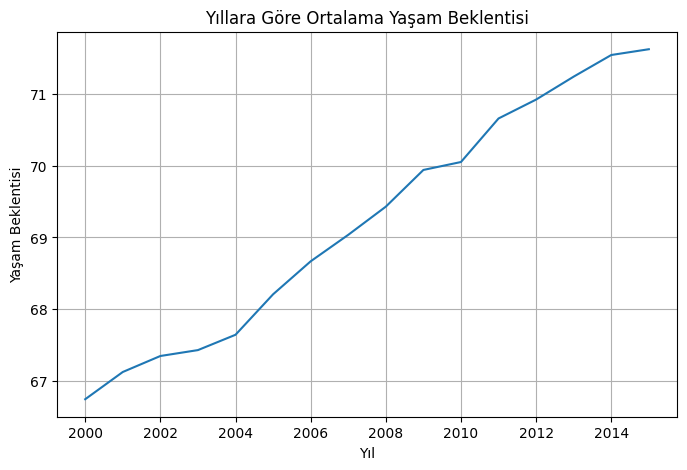

In [ ]:
import matplotlib.pyplot as plt

# Yıllara göre ortalama yaşam beklentisi
yearly_life = df.groupby("Year")["Life expectancy "].mean()

# Grafik
plt.figure(figsize=(8,5))
yearly_life.plot()
plt.title("Yıllara Göre Ortalama Yaşam Beklentisi")
plt.xlabel("Yıl")
plt.ylabel("Yaşam Beklentisi")
plt.grid(True)
plt.show()


In [ ]:
corr = df.corr(numeric_only=True)["Life expectancy "].sort_values(ascending=False)
corr


,Life expectancy
Life expectancy,1.000000
Schooling,0.751975
Income composition of resources,0.724776
BMI,0.567694
Diphtheria,0.479495
Polio,0.465556
GDP,0.461455
Alcohol,0.404877
percentage expenditure,0.381864
Hepatitis B,0.256762


In [ ]:
corr.head(10)


,Life expectancy
Life expectancy,1.000000
Schooling,0.709315
Income composition of resources,0.593499
BMI,0.544668
Diphtheria,0.470119
Polio,0.456296
GDP,0.428324
percentage expenditure,0.381277
Alcohol,0.368554
Total expenditure,0.206949


In [ ]:
corr.tail(10)


,Life expectancy
Year,0.171183
Hepatitis B,0.147037
Population,-0.030187
Measles,-0.157817
infant deaths,-0.196830
under-five deaths,-0.222798
thinness 5-9 years,-0.454124
thinness 1-19 years,-0.459840
HIV/AIDS,-0.556745
Adult Mortality,-0.696043


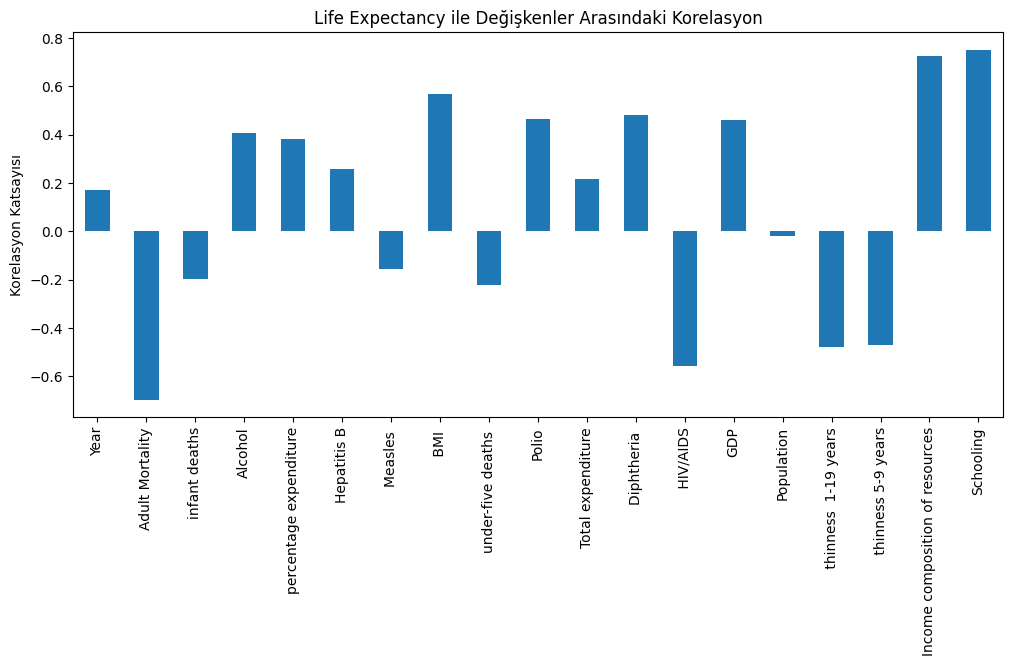

In [ ]:
import matplotlib.pyplot as plt

corr.drop("Life expectancy ").plot(kind="bar", figsize=(12,5))
plt.title("Life Expectancy ile Değişkenler Arasındaki Korelasyon")
plt.ylabel("Korelasyon Katsayısı")
plt.show()


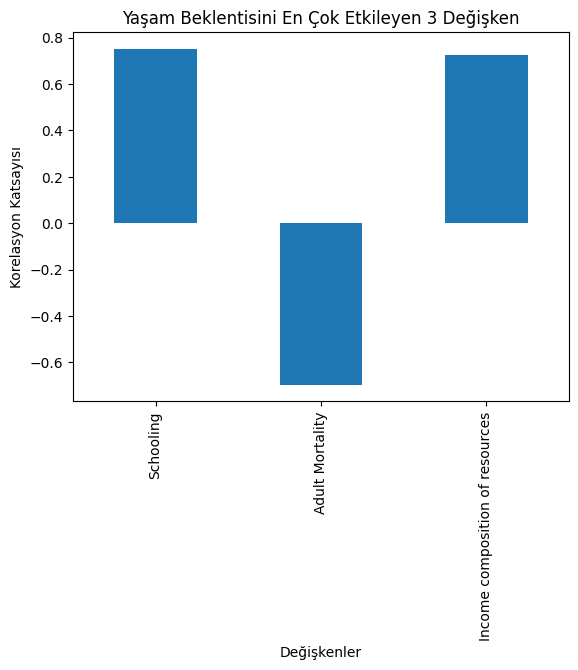

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("Life Expectancy Data.csv")

# Life expectancy ile korelasyonları hesapla
corr = df.corr(numeric_only=True)["Life expectancy "]

# En etkili 3 değişkeni seç
important_vars = [
    "Schooling",
    "Adult Mortality",
    "Income composition of resources"
]

important_corr = corr[important_vars]

# Grafik çiz
important_corr.plot(kind="bar")
plt.title("Yaşam Beklentisini En Çok Etkileyen 3 Değişken")
plt.ylabel("Korelasyon Katsayısı")
plt.xlabel("Değişkenler")
plt.show()


In [ ]:
X = df[[
    "Schooling",
    "Adult Mortality",
    "Income composition of resources"
]]

y = df["Life expectancy "]



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Veri setini tekrar yükle
df = pd.read_csv("Life Expectancy Data.csv")


X = df[[
    "Schooling",
    "Adult Mortality",
    "Income composition of resources"
]]

y = df["Life expectancy "]

# %70 - %30 ayırdık
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Performans
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.7604111587453318, np.float64(4.6406912979125226))

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae


3.2628789234408466

KeyError: "['BMI', 'Infant deaths'] not in index"

In [ ]:
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
features2 = [
    "Schooling",
    "Adult Mortality",
    "Income composition of resources",
    " BMI ",
    "infant deaths",
    "Alcohol"
]

X2 = df[features2]
y = df["Life expectancy "]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


(0.7360442700284726, np.float64(4.703567715998721), 3.3409276333008844)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


(0.7360442700284726, np.float64(4.703567715998721), 3.3409276333008844)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge) ** 0.5

r2_ridge, rmse_ridge


(0.7364510025601314, 4.699942427108686)

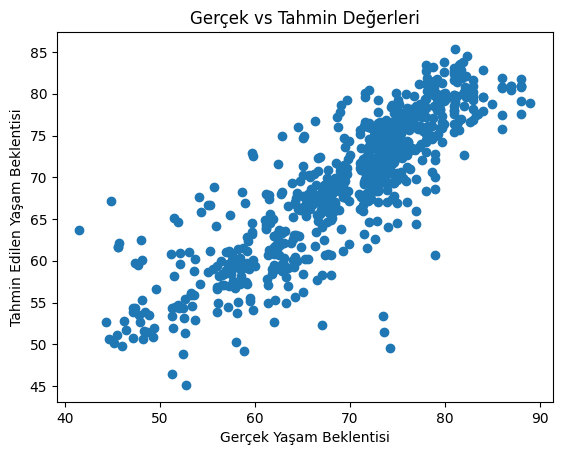

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Yaşam Beklentisi")
plt.ylabel("Tahmin Edilen Yaşam Beklentisi")
plt.title("Gerçek vs Tahmin Değerleri")
plt.show()


In [ ]:
features_tree = [
    "Schooling",
    "Adult Mortality",
    "Income composition of resources"
]


In [ ]:
X_tree = df[features_tree]
y_tree = df["Life expectancy "]

X_tree = X_tree.dropna()
y_tree = y_tree.loc[X_tree.index]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_tree = tree_model.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

r2_tree, rmse_tree


(0.8070408977011352, np.float64(4.164683681888179))

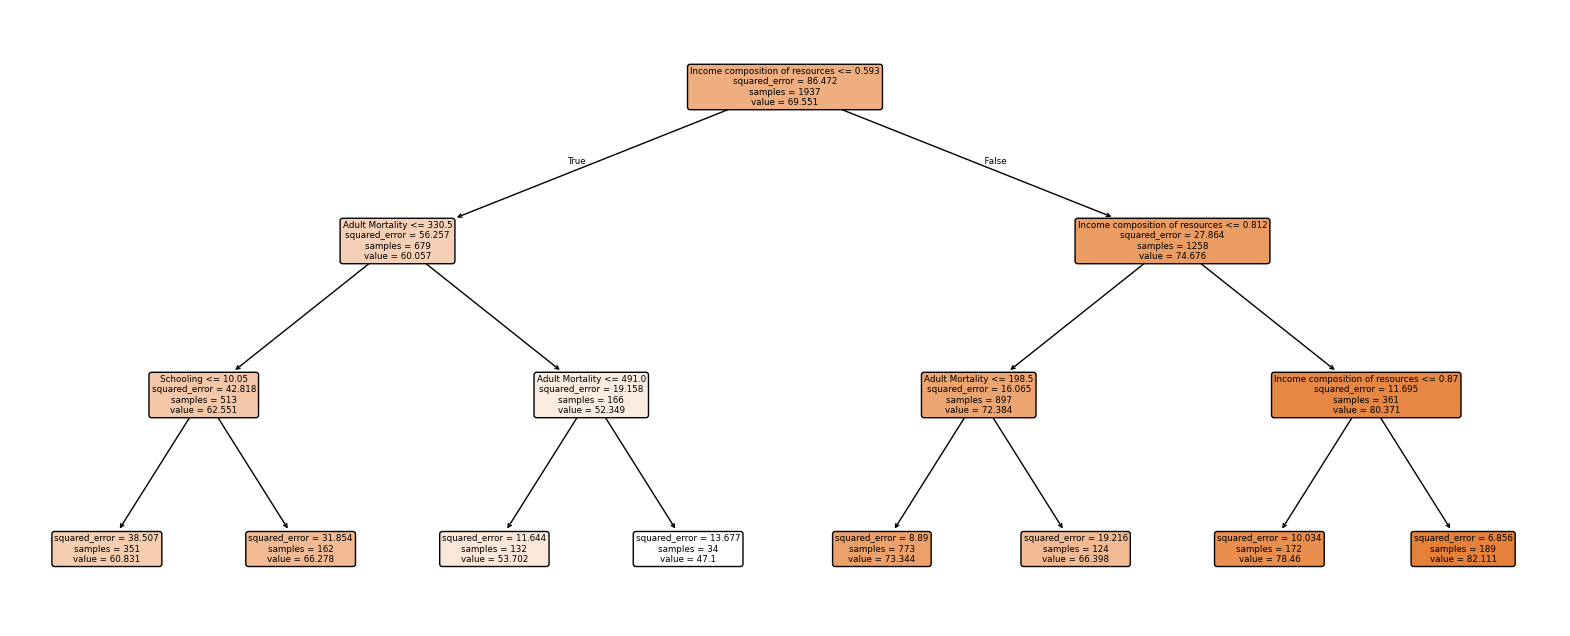

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plot_tree(
    tree_model,
    feature_names=X_tree.columns,
    filled=True,
    rounded=True
)
plt.show()
